# Trabajo Práctico número 1

## Carga de utilities

In [1]:
import numpy as np
import cv2 as cv

In [2]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from utilities.graficos import graficar_imagen_e_histograma, graficar_2_histogramas, graficar_2_imagenes
from utilities.images import ImageData

## Parte 1

1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
1. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [3]:
test_blue_path = "./material/white_patch/test_blue.png"
test_green_path = "./material/white_patch/test_green.png"
test_red_path = "./material/white_patch/test_red.png"
wp_blue_path = "./material/white_patch/wp_blue.jpg"
wp_green_1_path = "./material/white_patch/wp_green.png"
wp_green_2_path = "./material/white_patch/wp_green2.jpg"
wp_red_1_path = "./material/white_patch/wp_red.png"
wp_red_2_path = "./material/white_patch/wp_red2.jpg"

In [4]:
imgs_dict = {
    "test_blue": ImageData(path=test_blue_path),
    "test_green": ImageData(path=test_green_path),
    "test_red": ImageData(path=test_red_path),
    "wp_blue": ImageData(path=wp_blue_path),
    "wp_green_1": ImageData(path=wp_green_1_path),
    "wp_green_2": ImageData(path=wp_green_2_path),
    "wp_red_1": ImageData(path=wp_red_1_path),
    "wp_red_2": ImageData(path=wp_red_2_path),
}

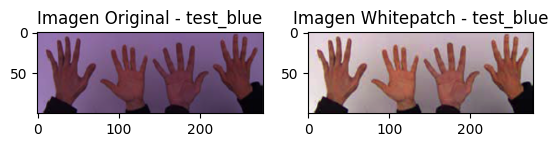

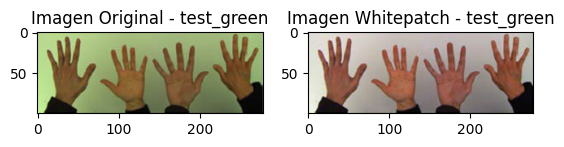

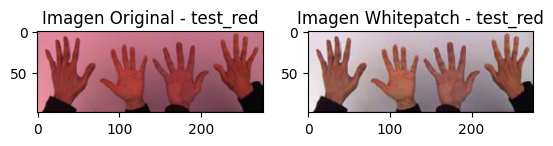

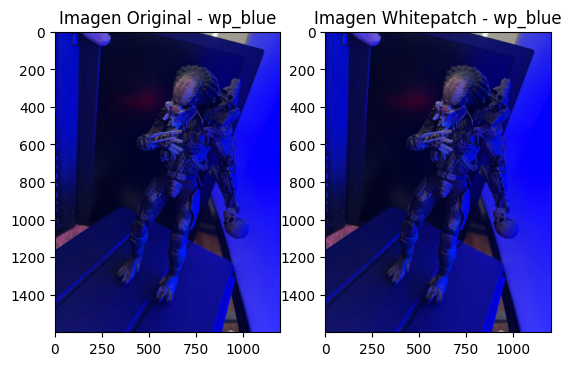

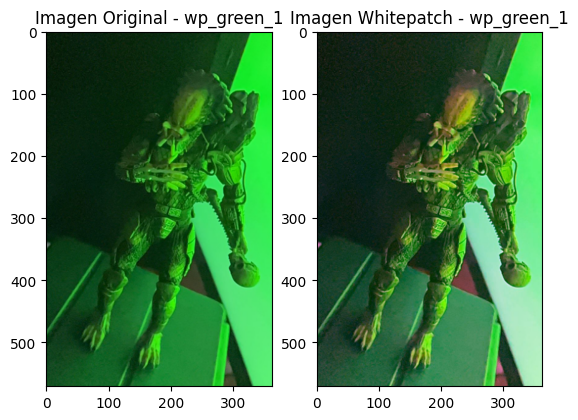

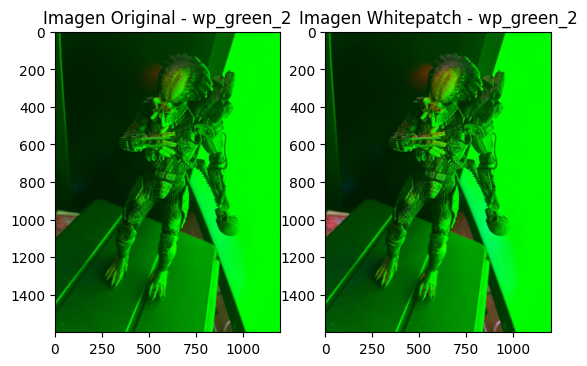

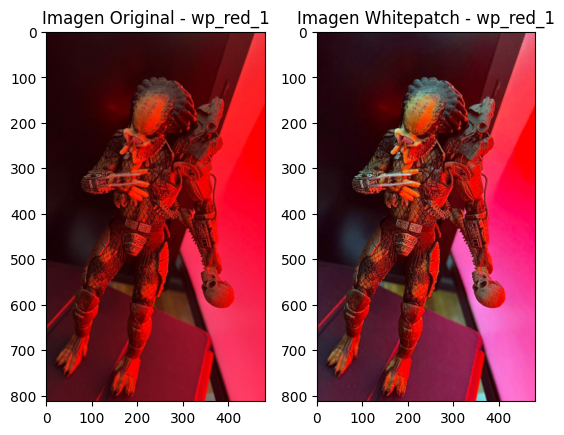

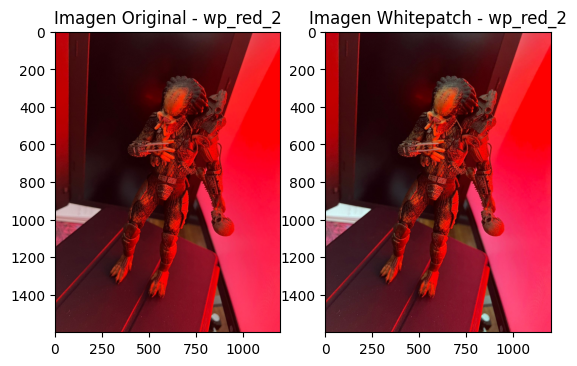

In [5]:
for img_name, img_data in imgs_dict.items():
    graficar_2_imagenes(imagen1=img_data.rgbImage, title1=f"Imagen Original - {img_name}",
                        imagen2=img_data.whitePatchImage, title2=f"Imagen Whitepatch - {img_name}")

## Parte 2

1. Para las imágenes *img1_tp.png* y *img2_tp.png* leerlas con OpenCV en escala de grisas y visualizarlas. 
1. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como *features* a los histogramas?

### Carga y visualización de imágenes con sus histogramas

In [6]:
img1_path = "./material/img1_tp.png"
img2_path = "./material/img2_tp.png"

In [7]:
img1 = cv.imread(img1_path, cv.IMREAD_GRAYSCALE)
img2 = cv.imread(img2_path, cv.IMREAD_GRAYSCALE)

In [8]:
print(f"Tamaño de la imagen 1: {img1.shape}")
print(f"Tamaño de la imagen 2: {img2.shape}")

Tamaño de la imagen 1: (288, 287)
Tamaño de la imagen 2: (288, 287)


A continuación, se grafica la imagen 1 y su histograma, utilizando *256* bins:

In [9]:
hist_img1, bins_img1 = np.histogram(img1.ravel(), 256, [0, 256])

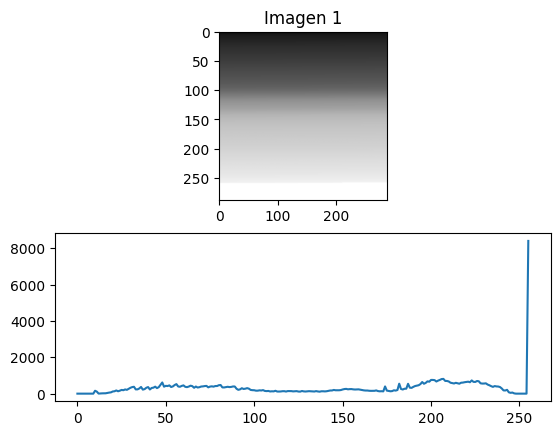

In [10]:
graficar_imagen_e_histograma(imagen=img1, histograma=hist_img1, cmap='gray', vmin=0, vmax=255, title="Imagen 1")

A continuación, se grafica la imagen 2 y su histograma, utilizando *256* bins:

In [11]:
hist_img2, bins_img2 = np.histogram(img2.ravel(), 256, [0, 256])

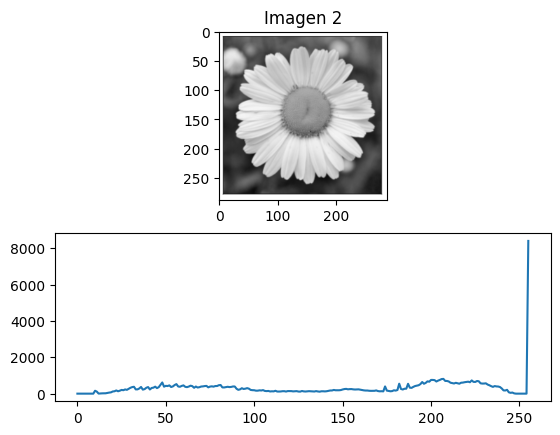

In [12]:
graficar_imagen_e_histograma(imagen=img2, histograma=hist_img2, cmap='gray', vmin=0, vmax=255, title="Imagen 2")

### Comparación de histogramas

A simple vista, los histogramas de las imágenes 1 y 2, utilizando *256* bins, parecen ser similares.

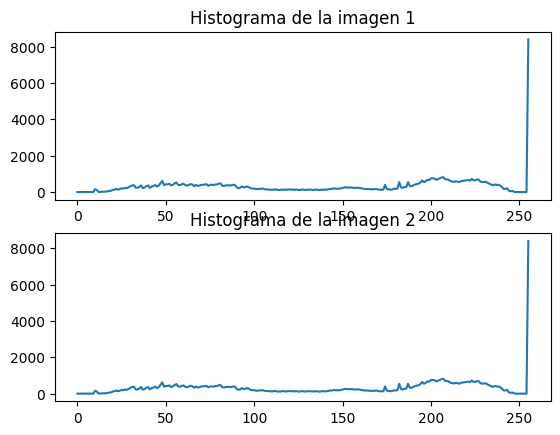

In [13]:
graficar_2_histogramas(histograma1=hist_img1, histograma2=hist_img2, title1="Histograma de la imagen 1", title2="Histograma de la imagen 2")

Para corroborar de manera analítica que se tratan de los mismos histogramas, se utilizará la función [compareHist](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gaf4190090efa5c47cb367cf97a9a519bd) de *OpenCV* con las siguientes métricas:

- ***Correlación*** ([HISTCMP_CORREL](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386a38c6d2cb4ae572e00aebd5642fae2add)): devuelve un valor entre $0$ y $1$. A mayor valor, mayor similitud entre histogramas.
- ***Chi-cuadrado*** ([HISTCMP_CHISQR](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386aa88d6751fb2bb79e07aa8c8717fda881)): implementa la distancia de *Chi-Square*. A menor valor, mayor similitud entre histogramas ($0$ para histogramas idénticos).
- ***Bhattacharyya*** ([HISTCMP_BHATTACHARYYA](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386ad75f6e8385d2e29479cf61ba87b57450)): calcula la distancia de *Bhattacharyya*. A menor valor, mayor similitud entre histogramas ($0$ para histogramas idénticos).

***Fuentes***:
- [OpenCV - Histograms](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html).
- [OpenCV - Histogram comparison](https://docs.opencv.org/4.x/d8/dc8/tutorial_histogram_comparison.html#autotoc_md612).

In [14]:
# Aseguro que el tipo sea float 32.
h1 = hist_img1.astype(np.float32)
h2 = hist_img2.astype(np.float32)

corr = cv.compareHist(h1, h2, cv.HISTCMP_CORREL)
chi2 = cv.compareHist(h1, h2, cv.HISTCMP_CHISQR)
bhat = cv.compareHist(h1, h2, cv.HISTCMP_BHATTACHARYYA)

print(f"""Comparación de Histogramas:
      \tCorrelación:                {corr}
      \tDistancia Chi-Square:       {chi2}
      \tDistancia de Bhattacharyya: {bhat}
""")

Comparación de Histogramas:
      	Correlación:                1.0
      	Distancia Chi-Square:       0.0
      	Distancia de Bhattacharyya: 0.0



Estos son los resultados obtenidos al comparar ambos histogramas mediante diferentes métricas:

- ***Correlación***: $1$, lo cual indica que los histogramas son idénticos.
- ***Chi-cuadrado***: $0$, lo cual indica que los histogramas son idénticos.
- ***Bhattacharyya***: $0$, lo cual indica que los histogramas son idénticos.

Es decir, los histogramas de las imágenes $1$ y $2$ son idénticos.

### Estudio de diferente cantidad de bins

In [15]:
cant_bins = [2 ** i for i in range(2, 9)]

In [16]:
for bin in cant_bins:
    hist_img1, bins_img1 = np.histogram(img1.ravel(), bin, [0, 256])
    hist_img2, bins_img2 = np.histogram(img2.ravel(), bin, [0, 256])

    # Aseguro que el tipo sea float 32.
    h1 = hist_img1.astype(np.float32)
    h2 = hist_img2.astype(np.float32)

    corr = cv.compareHist(h1, h2, cv.HISTCMP_CORREL)
    chi2 = cv.compareHist(h1, h2, cv.HISTCMP_CHISQR)
    bhat = cv.compareHist(h1, h2, cv.HISTCMP_BHATTACHARYYA)

    print(f"""Comparación de Histogramas con {bin} bins:
        \tCorrelación:                {corr}
        \tDistancia Chi-Square:       {chi2}
        \tDistancia de Bhattacharyya: {bhat}
    """)

Comparación de Histogramas con 4 bins:
        	Correlación:                1.0
        	Distancia Chi-Square:       0.0
        	Distancia de Bhattacharyya: 0.0
    
Comparación de Histogramas con 8 bins:
        	Correlación:                1.0
        	Distancia Chi-Square:       0.0
        	Distancia de Bhattacharyya: 0.0
    
Comparación de Histogramas con 16 bins:
        	Correlación:                1.0
        	Distancia Chi-Square:       0.0
        	Distancia de Bhattacharyya: 0.0
    
Comparación de Histogramas con 32 bins:
        	Correlación:                1.0
        	Distancia Chi-Square:       0.0
        	Distancia de Bhattacharyya: 0.0
    
Comparación de Histogramas con 64 bins:
        	Correlación:                1.0
        	Distancia Chi-Square:       0.0
        	Distancia de Bhattacharyya: 0.0
    
Comparación de Histogramas con 128 bins:
        	Correlación:                1.0
        	Distancia Chi-Square:       0.0
        	Distancia de Bhattacharyya: 0.

### Estudio de técnicas de binarización

#### Binarización Fija

In [17]:
ret_1, thresh_1 = cv.threshold(img1, 120, 255, cv.THRESH_BINARY)
ret_2, thresh_2 = cv.threshold(img2, 120, 255, cv.THRESH_BINARY)

In [18]:
hist_img1, bins_img1 = np.histogram(thresh_1.ravel(), 256, [0, 256])
hist_img2, bins_img2 = np.histogram(thresh_2.ravel(), 256, [0, 256])

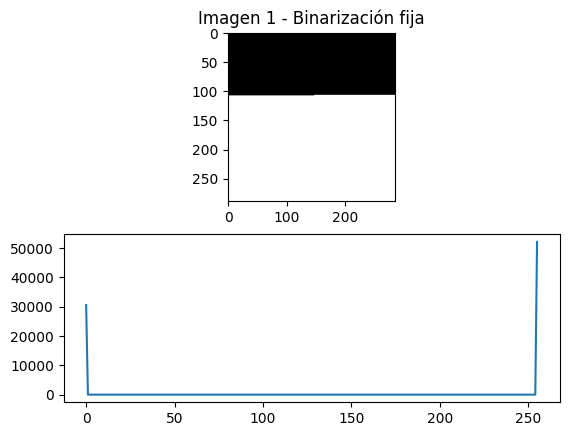

In [19]:
graficar_imagen_e_histograma(imagen=thresh_1, histograma=hist_img1, cmap='gray', vmin=0, vmax=1, title="Imagen 1 - Binarización fija")

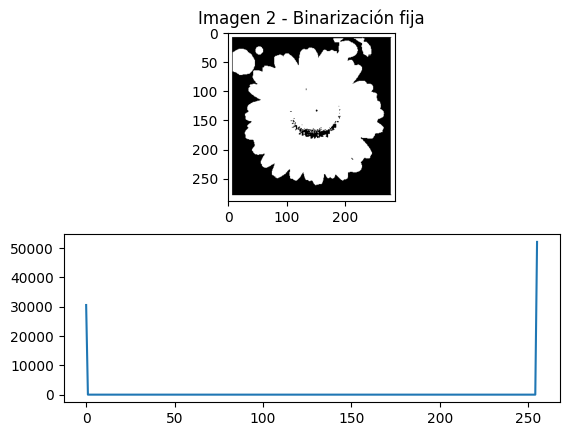

In [20]:
graficar_imagen_e_histograma(imagen=thresh_2, histograma=hist_img2, cmap='gray', vmin=0, vmax=1, title="Imagen 2 - Binarización fija")

In [21]:
# Aseguro que el tipo sea float 32.
h1 = hist_img1.astype(np.float32)
h2 = hist_img2.astype(np.float32)

corr = cv.compareHist(h1, h2, cv.HISTCMP_CORREL)
chi2 = cv.compareHist(h1, h2, cv.HISTCMP_CHISQR)
bhat = cv.compareHist(h1, h2, cv.HISTCMP_BHATTACHARYYA)

print(f"""Comparación de Histogramas - Binarización fija:
      \tCorrelación:                {corr}
      \tDistancia Chi-Square:       {chi2}
      \tDistancia de Bhattacharyya: {bhat}
""")

Comparación de Histogramas - Binarización fija:
      	Correlación:                1.0
      	Distancia Chi-Square:       0.0
      	Distancia de Bhattacharyya: 0.0



| Métrica | Resultado |
| --- | --- |
| Correlación                | 1.0 |
| Distancia Chi-Square       | 0.0 |
| Distancia de Bhattacharyya | 0.0 |

A partir de los valores obtenidos por las métricas de *Correlación*, *Distancia Chi-Square* y *Distancia de Bhattacharyya* podemos decir que los histogramas son idénticos, lo cual coincide con lo que se puede ver en los gráficos.

#### Binarización Otsu

In [22]:
ret_1, thresh_1 = cv.threshold(img1, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
ret_2, thresh_2 = cv.threshold(img2, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

In [23]:
hist_img1, bins_img1 = np.histogram(thresh_1.ravel(), 256, [0, 256])
hist_img2, bins_img2 = np.histogram(thresh_2.ravel(), 256, [0, 256])

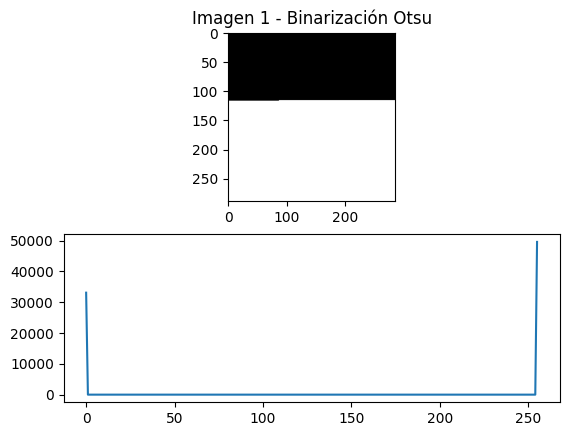

In [24]:
graficar_imagen_e_histograma(imagen=thresh_1, histograma=hist_img1, cmap='gray', vmin=0, vmax=1, title="Imagen 1 - Binarización Otsu")

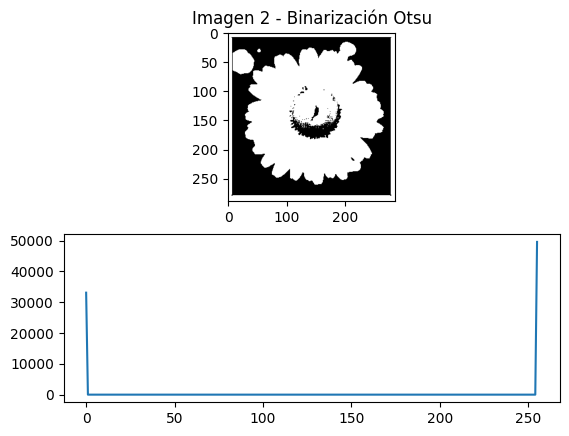

In [25]:
graficar_imagen_e_histograma(imagen=thresh_2, histograma=hist_img2, cmap='gray', vmin=0, vmax=1, title="Imagen 2 - Binarización Otsu")

In [26]:
# Aseguro que el tipo sea float 32.
h1 = hist_img1.astype(np.float32)
h2 = hist_img2.astype(np.float32)

corr = cv.compareHist(h1, h2, cv.HISTCMP_CORREL)
chi2 = cv.compareHist(h1, h2, cv.HISTCMP_CHISQR)
bhat = cv.compareHist(h1, h2, cv.HISTCMP_BHATTACHARYYA)

print(f"""Comparación de Histogramas - Binarización Otsu:
      \tCorrelación:                {corr}
      \tDistancia Chi-Square:       {chi2}
      \tDistancia de Bhattacharyya: {bhat}
""")

Comparación de Histogramas - Binarización Otsu:
      	Correlación:                1.0
      	Distancia Chi-Square:       0.0
      	Distancia de Bhattacharyya: 0.0



| Métrica | Resultado |
| --- | --- |
| Correlación                | 1.0 |
| Distancia Chi-Square       | 0.0 |
| Distancia de Bhattacharyya | 0.0 |

A partir de los valores obtenidos por las métricas de *Correlación*, *Distancia Chi-Square* y *Distancia de Bhattacharyya* podemos decir que los histogramas son idénticos, lo cual coincide con lo que se puede ver en los gráficos.

#### Binarización por Media

In [27]:
thresh_1 = cv.adaptiveThreshold(img1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
thresh_2 = cv.adaptiveThreshold(img2, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

In [28]:
hist_img1, bins_img1 = np.histogram(thresh_1.ravel(), 255, [0, 255])
hist_img2, bins_img2 = np.histogram(thresh_2.ravel(), 255, [0, 255])

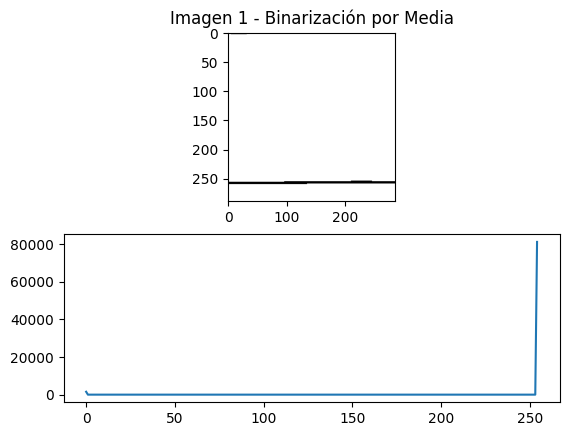

In [29]:
graficar_imagen_e_histograma(imagen=thresh_1, histograma=hist_img1, cmap='gray', vmin=0, vmax=1, title="Imagen 1 - Binarización por Media")

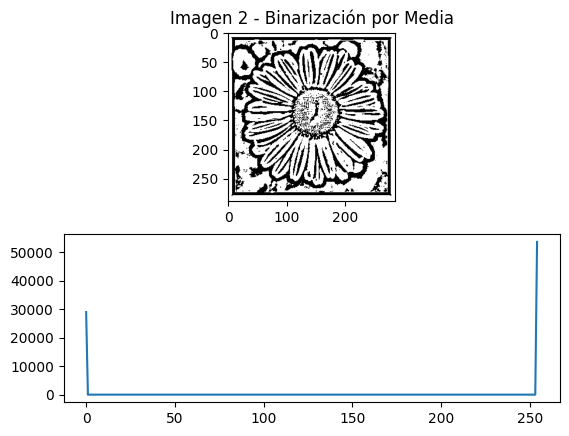

In [30]:
graficar_imagen_e_histograma(imagen=thresh_2, histograma=hist_img2, cmap='gray', vmin=0, vmax=1, title="Imagen 2 - Binarización por Media")

In [31]:
# Aseguro que el tipo sea float 32.
h1 = hist_img1.astype(np.float32)
h2 = hist_img2.astype(np.float32)

corr = cv.compareHist(h1, h2, cv.HISTCMP_CORREL)
chi2 = cv.compareHist(h1, h2, cv.HISTCMP_CHISQR)
bhat = cv.compareHist(h1, h2, cv.HISTCMP_BHATTACHARYYA)

print(f"""Comparación de Histogramas - Binarización por Media:
      \tCorrelación:                {corr}
      \tDistancia Chi-Square:       {chi2}
      \tDistancia de Bhattacharyya: {bhat}
""")

Comparación de Histogramas - Binarización por Media:
      	Correlación:                0.8880583674302963
      	Distancia Chi-Square:       500405.08770251455
      	Distancia de Bhattacharyya: 0.34802753538457903



| Métrica | Resultado |
| --- | --- |
| Correlación                | 0.8880583674302963 |
| Distancia Chi-Square       | 500405.08770251455 |
| Distancia de Bhattacharyya | 0.34802753538457903 |

A partir de los valores obtenidos por las métricas de *Correlación* y *Distancia de Bhattacharyya* podemos decir que los histogramas son similares, pero NO idénticos, lo cual coincide con lo que se puede ver en los gráficos.

En cuanto a la *Distancia Chi-Square*, esta da a entender que los histogramas *NO* son similares *NI* idénticos, lo cual se contradice con las otras dos métricas, como así también con los gráficos de estos histogramas.

### Conclusiones de Parte 2

En esta sección se analizaron las imágenes `img1_tp.png` e `img2_tp.png`. Estas se leyeron mediante *OpenCV* utilizando escala de *grises*, y luego se calcularon y compararon sus respectivos histogramas de diversas maneras:

***Histogramas de 256 bins***

- Se decidió comenzar con el análisis de histogramas con *256 bins* (8 bits).
- Una vez obtenido el histograma de cada imagen, se graficaron en conjunto para compararlos, en donde se observó que eran similares.
- Para confirmarlo, se los comparó nuevamente utilizando la función [compareHist](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gaf4190090efa5c47cb367cf97a9a519bd) de *OpenCV*.
- En particular, se estudiaron las métricas de ***Correlación*** ([HISTCMP_CORREL](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386a38c6d2cb4ae572e00aebd5642fae2add)), ***Chi-cuadrado*** ([HISTCMP_CHISQR](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386aa88d6751fb2bb79e07aa8c8717fda881)) y ***Bhattacharyya*** ([HISTCMP_BHATTACHARYYA](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386ad75f6e8385d2e29479cf61ba87b57450)).
- En todos los casos se llegó a la conclusión que los histogramas eran idénticos.

***Histogramas con bins potencia de dos***

- A fin de estudicar otros valores de cantidades de bins sobre los histogramas, se decidió utilizar potencias de dos entre $4$ y $256$.
- Una vez obtenidos los histogramas de las dos imágenes para ambos casos, se los comparó de manera similar al punto anterior, utilizando gráficos y la función [compareHist](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gaf4190090efa5c47cb367cf97a9a519bd) de *OpenCV* (con las mismas métricas).
- En todos los casos se llegó a la conclusión que los histogramas para ambas imágenes eran idénticos.

***Estudio de otras técnicas de binarización***

- Por último, se estudiaron técnicas de binarización para obtener los histogramas.
- En cuanto a la comparación, se utilizaron los métodos y métricas mencionadas en los pasos anteriores.
- Las técnicas de binarización estudiadas fueron *Binarización Fija*, *Binarización OTSU* y *Binarización por Media*.
- Para los casos de *Binarización Fija* y *Binarización OTSU*, la comparación de los histogramas de las imágenes $1$ y $2$ dio como resultado que eran ***idénticos***.
- Para el caso de *Binarización por Media*, los resultados de comparar los histogramas dieron como resultados que eran ***similares***, pero ***NO idénticos***.

***Conclusiones***

Al leer las imágenes `img1_tp.png` e `img2_tp.png` en escala de grises, obtener sus histogramas mediante diferentes métodos, y comparar estos con diversas métricas, se llega siempre a la conclusión de que son ***idénticos*** (con excepción de la binarización por media, donde indica que son *similares*).

Esto se debe a que la distribución de pixeles al escalar en grises es la misma en ambas imágenes.

En cuanto a la pregunta de la consigna `si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como *features* a los histogramas?`, la respuesta es *NO*, ya que en el análisis realizado se encontró un caso en donde los histogramas de dos imágenes distintas son idénticos (o similares).